# Lecture 04
2019-05-07

Course material is available at http://unihb.eu/pdap2019

## Questions about reading assignment
 
* ~~Create pandas.Series object from dictionary with specifying index~~
* 

## Transcript

1. Pandas basics


### Pandas basics

In [1]:
import numpy as np
import pandas as pd

A numpy array is just data, there is no additional information about what the dimensions / entries actually *mean*.

In [2]:
olddata = np.loadtxt('../../data/inflammation-01.csv', delimiter=',')
olddata

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In a pandas.DataFrame, this is different:

In [3]:
newdata = pd.read_csv('../data/inflammation-01-pandas.csv')
newdata.head(2)

date  Michael  James  John  Robert  David  William  Mary  \
0  2018-09-01        0      0     0       0      0        0     0   
1  2018-09-02        0      1     1       0      1        0     0   

   Christopher  Joseph  ...  Brandon  Stephanie  Emily  Melissa  Gary  Edward  \
0            0       0  ...        0          0      0        0     0       0   
1            0       0  ...        1          1      0        0     1       0   

   Stephen  Scott  George  Donna  
0        0      0       0      0  
1        1      1       0      0  

[2 rows x 61 columns]

This particular DataFrame has 40 rows and 61 columns:

In [4]:
newdata.shape

(40, 61)

The columns are named after the first row of the data file:

In [5]:
newdata.columns

Index(['date', 'Michael', 'James', 'John', 'Robert', 'David', 'William',
       'Mary', 'Christopher', 'Joseph', 'Richard', 'Daniel', 'Thomas',
       'Matthew', 'Jennifer', 'Charles', 'Anthony', 'Patricia', 'Linda',
       'Mark', 'Elizabeth', 'Joshua', 'Steven', 'Andrew', 'Kevin', 'Brian',
       'Barbara', 'Jessica', 'Jason', 'Susan', 'Timothy', 'Paul', 'Kenneth',
       'Lisa', 'Ryan', 'Sarah', 'Karen', 'Jeffrey', 'Donald', 'Ashley', 'Eric',
       'Jacob', 'Nicholas', 'Jonathan', 'Ronald', 'Michelle', 'Kimberly',
       'Nancy', 'Justin', 'Sandra', 'Amanda', 'Brandon', 'Stephanie', 'Emily',
       'Melissa', 'Gary', 'Edward', 'Stephen', 'Scott', 'George', 'Donna'],
      dtype='object')

and the rows are named after the first column of the data file:

In [6]:
newdata.index

RangeIndex(start=0, stop=40, step=1)

We can select a single column using square brackets `[]` and the column label:

In [7]:
newdata['John']

0      0
1      1
2      1
3      3
4      3
5      2
6      6
7      2
8      5
9      9
10     5
11     7
12     4
13     5
14     4
15    15
16     5
17    11
18     9
19    10
20    19
21    14
22    12
23    17
24     7
25    12
26    11
27     7
28     4
29     2
30    10
31     5
32     4
33     2
34     2
35     3
36     2
37     2
38     1
39     1
Name: John, dtype: int64

### Pandas date/time handling (1)

Using `parse_dates` and `index_col` kwargs, we can tell pandas.read_csv to "understand" date information from the data file:

In [8]:
datedata = pd.read_csv('../data/inflammation-01-pandas.csv', parse_dates=['date'], index_col='date')
datedata.head(3)

Michael  James  John  Robert  David  William  Mary  Christopher  \
date                                                                          
2018-09-01        0      0     0       0      0        0     0            0   
2018-09-02        0      1     1       0      1        0     0            0   
2018-09-03        1      2     1       2      1        1     2            1   

            Joseph  Richard  ...  Brandon  Stephanie  Emily  Melissa  Gary  \
date                         ...                                             
2018-09-01       0        0  ...        0          0      0        0     0   
2018-09-02       0        1  ...        1          1      0        0     1   
2018-09-03       0        1  ...        2          2      0        2     2   

            Edward  Stephen  Scott  George  Donna  
date                                               
2018-09-01       0        0      0       0      0  
2018-09-02       0        1      1       0      0  
2018-09-03       1        1      1       0      1  

[3 rows x 60 columns]

Now, the date information is the row label, and it's easier to understand the data:

In [9]:
datedata['John']

date
2018-09-01     0
2018-09-02     1
2018-09-03     1
2018-09-04     3
2018-09-05     3
2018-09-06     2
2018-09-07     6
2018-09-08     2
2018-09-09     5
2018-09-10     9
2018-09-11     5
2018-09-12     7
2018-09-13     4
2018-09-14     5
2018-09-15     4
2018-09-16    15
2018-09-17     5
2018-09-18    11
2018-09-19     9
2018-09-20    10
2018-09-21    19
2018-09-22    14
2018-09-23    12
2018-09-24    17
2018-09-25     7
2018-09-26    12
2018-09-27    11
2018-09-28     7
2018-09-29     4
2018-09-30     2
2018-10-01    10
2018-10-02     5
2018-10-03     4
2018-10-04     2
2018-10-05     2
2018-10-06     3
2018-10-07     2
2018-10-08     2
2018-10-09     1
2018-10-10     1
Name: John, dtype: int64

Before plotting in the notebook, we need to run the following [magic function](https://ipython.readthedocs.io/en/stable/interactive/magics.html) once:

In [10]:
%matplotlib inline

Pandas Series and DataFrames have a `.plot()` method to make a quick'n'dirty plot of the data (helpful for interactive use)

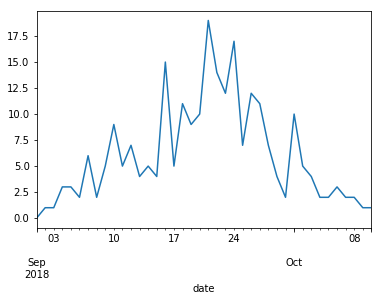

In [11]:
datedata['John'].plot()

Compared to the "traditional" way of plotting, it is superior (traditional plotting doesn't know that x-axis contains date information)

In [12]:
import matplotlib.pyplot as plt

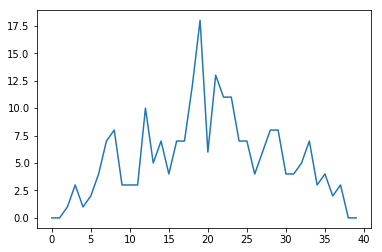

In [13]:
plt.plot(olddata[0])

When plotting a DataFrame, pandas will by default make one line plot for each column

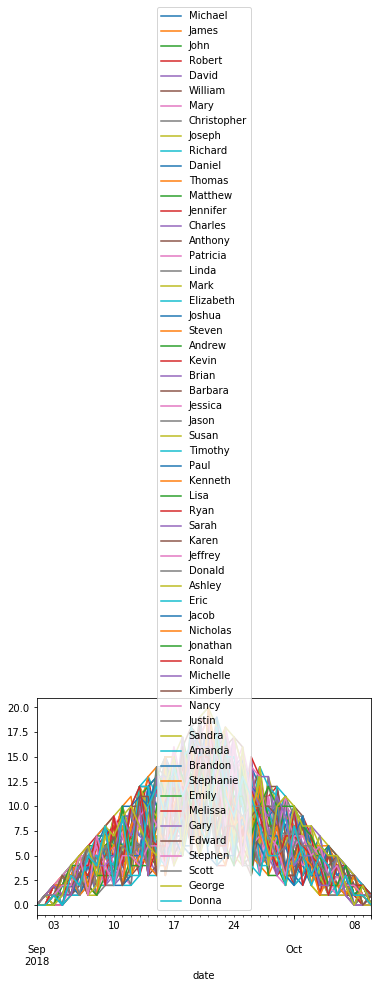

In [14]:
datedata.plot()

When reading data with `read_csv`, the `index_col` kwarg determines which column will be used as the row labels (this example is a bit useless):

In [15]:
pd.read_csv('../data/inflammation-01-pandas.csv', parse_dates=['date'], index_col='Joseph')

date  Michael  James  John  Robert  David  William  Mary  \
Joseph                                                                  
0      2018-09-01        0      0     0       0      0        0     0   
0      2018-09-02        0      1     1       0      1        0     0   
0      2018-09-03        1      2     1       2      1        1     2   
3      2018-09-04        3      1     3       0      3        2     2   
1      2018-09-05        1      2     3       4      3        2     4   
5      2018-09-06        2      1     2       2      1        4     2   
6      2018-09-07        4      3     6       2      3        2     2   
5      2018-09-08        7      2     2       1      5        1     5   
5      2018-09-09        8      2     5       6      2        6     5   
8      2018-09-10        3      6     9       7      4        4     8   
2      2018-09-11        3     10     5      10      4        7     6   
4      2018-09-12        3     11     7       7      7        6     5   
11     2018-09-13       10      5     4       9      6        6    11   
12     2018-09-14        5      9     5      13      5        9     9   
10     2018-09-15        7      4     4       8      3        9     4   
11     2018-09-16        4      4    15       8     10       15    13   
9      2018-09-17        7      7     5      15      8        4     5   
10     2018-09-18        7     16    11      10     10       16    12   
17     2018-09-19       12      8     9      10      6       18    10   
11     2018-09-20       18      6    10       7     17       12     6   
6      2018-09-21        6     18    19      17      9       12     9   
16     2018-09-22       13      4    14       4     14        5    17   
12     2018-09-23       11     12    12       4      9       18    15   
6      2018-09-24       11      5    17       7      7        9     8   
8      2018-09-25        7     12     7       6     13        5     9   
14     2018-09-26        7      7    12      15      9        3     3   
6      2018-09-27        4     11    11       6     12       10    13   
13     2018-09-28        6      5     7       4      6        3     7   
10     2018-09-29        8     11     4       9      7       12     8   
11     2018-09-30        8      3     2      11      7        7     2   
4      2018-10-01        4      3    10       3      9        8     8   
6      2018-10-02        4      5     5       5      6        4     8   
4      2018-10-03        5      4     4       6      3        7     4   
7      2018-10-04        7      4     2       3      2        3     2   
6      2018-10-05        3      5     2       3      2        5     3   
3      2018-10-06        4      5     3       4      4        4     5   
2      2018-10-07        2      1     2       2      2        4     4   
1      2018-10-08        3      1     2       3      0        3     1   
0      2018-10-09        0      0     1       2      1        2     1   
0      2018-10-10        0      1     1       1      1        1     1   

        Christopher  Richard  ...  Brandon  Stephanie  Emily  Melissa  Gary  \
Joseph                        ...                                             
0                 0        0  ...        0          0      0        0     0   
0                 0        1  ...        1          1      0        0     1   
0                 1        1  ...        2          2      0        2     2   
3                 2        2  ...        1          2      2        1     1   
1                 3        1  ...        1          3      4        1     1   
5                 1        3  ...        3          5      4        4     4   
6                 2        5  ...        5          2      5        4     5   
5                 3        3  ...        3          4      3        7     4   
5                 5        5  ...        6          5      3        2     4   
8                 3        8  ...        3          6      3        9     5  

When a DataFrame has a DatetimeIndex, Pandas can be smart about selecting dates based on strings.

For example, our data contain values from 01 Sep to 10 Oct.  We can select based on months:

In [16]:
datedata.loc['2018-09']

Michael  James  John  Robert  David  William  Mary  Christopher  \
date                                                                          
2018-09-01        0      0     0       0      0        0     0            0   
2018-09-02        0      1     1       0      1        0     0            0   
2018-09-03        1      2     1       2      1        1     2            1   
2018-09-04        3      1     3       0      3        2     2            2   
2018-09-05        1      2     3       4      3        2     4            3   
2018-09-06        2      1     2       2      1        4     2            1   
2018-09-07        4      3     6       2      3        2     2            2   
2018-09-08        7      2     2       1      5        1     5            3   
2018-09-09        8      2     5       6      2        6     5            5   
2018-09-10        3      6     9       7      4        4     8            3   
2018-09-11        3     10     5      10      4        7     6            7   
2018-09-12        3     11     7       7      7        6     5            8   
2018-09-13       10      5     4       9      6        6    11            8   
2018-09-14        5      9     5      13      5        9     9            5   
2018-09-15        7      4     4       8      3        9     4           10   
2018-09-16        4      4    15       8     10       15    13            9   
2018-09-17        7      7     5      15      8        4     5           15   
2018-09-18        7     16    11      10     10       16    12           11   
2018-09-19       12      8     9      10      6       18    10           18   
2018-09-20       18      6    10       7     17       12     6           19   
2018-09-21        6     18    19      17      9       12     9           20   
2018-09-22       13      4    14       4     14        5    17            8   
2018-09-23       11     12    12       4      9       18    15            5   
2018-09-24       11      5    17       7      7        9     8           13   
2018-09-25        7     12     7       6     13        5     9           15   
2018-09-26        7      7    12      15      9        3     3           10   
2018-09-27        4     11    11       6     12       10    13            6   
2018-09-28        6      5     7       4      6        3     7           10   
2018-09-29        8     11     4       9      7       12     8            6   
2018-09-30        8      3     2      11      7        7     2            7   

            Joseph  Richard  ...  Brandon  Stephanie  Emily  Melissa  Gary  \
date                         ...                                             
2018-09-01       0        0  ...        0          0      0        0     0   
2018-09-02       0        1  ...        1          1      0        0     1   
2018-09-03       0        1  ...        2          2      0        2     2   
2018-09-04       3        2  ...        1          2      2        1     1   
2018-09-05       1        1  ...        1          3      4        1     1   
2018-09-06       5        3  ...        3          5      4        4     4   
2018-09-07       6        5  ...        5          2      5        4     5   
2018-09-08       5        3  ...        3          4      3        7     4   
2018-09-09       5        5  ...        6          5      3        2     4   
2018-09-10       8        8  ...        3          6      3        9     5   
2018-09-11       2        6  ...       10          8     10        4     9   
2018-09-12       4        8  ...       10          3      4       10     7   
2018-09-13      11       12  ...       11          5      4       12    10   
2018-09-14      12        5  ...       10          4      4        7     3   
2018-09-15      10       13  ...       13          3     14        6    13   
2018-09-16      11        6  ...       10         15     11        6    13   
2018-09-17       9       13  ...       13         15     15       11     8   
2

We can even slice using months:

In [17]:
datedata.loc['2018-09':'2018-10']

Michael  James  John  Robert  David  William  Mary  Christopher  \
date                                                                          
2018-09-01        0      0     0       0      0        0     0            0   
2018-09-02        0      1     1       0      1        0     0            0   
2018-09-03        1      2     1       2      1        1     2            1   
2018-09-04        3      1     3       0      3        2     2            2   
2018-09-05        1      2     3       4      3        2     4            3   
2018-09-06        2      1     2       2      1        4     2            1   
2018-09-07        4      3     6       2      3        2     2            2   
2018-09-08        7      2     2       1      5        1     5            3   
2018-09-09        8      2     5       6      2        6     5            5   
2018-09-10        3      6     9       7      4        4     8            3   
2018-09-11        3     10     5      10      4        7     6            7   
2018-09-12        3     11     7       7      7        6     5            8   
2018-09-13       10      5     4       9      6        6    11            8   
2018-09-14        5      9     5      13      5        9     9            5   
2018-09-15        7      4     4       8      3        9     4           10   
2018-09-16        4      4    15       8     10       15    13            9   
2018-09-17        7      7     5      15      8        4     5           15   
2018-09-18        7     16    11      10     10       16    12           11   
2018-09-19       12      8     9      10      6       18    10           18   
2018-09-20       18      6    10       7     17       12     6           19   
2018-09-21        6     18    19      17      9       12     9           20   
2018-09-22       13      4    14       4     14        5    17            8   
2018-09-23       11     12    12       4      9       18    15            5   
2018-09-24       11      5    17       7      7        9     8           13   
2018-09-25        7     12     7       6     13        5     9           15   
2018-09-26        7      7    12      15      9        3     3           10   
2018-09-27        4     11    11       6     12       10    13            6   
2018-09-28        6      5     7       4      6        3     7           10   
2018-09-29        8     11     4       9      7       12     8            6   
2018-09-30        8      3     2      11      7        7     2            7   
2018-10-01        4      3    10       3      9        8     8            4   
2018-10-02        4      5     5       5      6        4     8            9   
2018-10-03        5      4     4       6      3        7     4            3   
2018-10-04        7      4     2       3      2        3     2            5   
2018-10-05        3      5     2       3      2        5     3            2   
2018-10-06        4      5     3       4      4        4     5            5   
2018-10-07        2      1     2       2      2        4     4            3   
2018-10-08        3      1     2       3      0        3     1            2   
2018-10-09        0      0     1       2      1        2     1            2   
2018-10-10        0      1     1       1      1        1     1            1   

            Joseph  Richard  ...  Brandon  Stephanie  Emily  Melissa  Gary  \
date                         ...                                             
2018-09-01       0        0  ...        0          0      0        0     0   
2018-09-02       0        1  ...        1          1      0        0     1   
2018-09-03       0        1  ...        2          2      0        2     2   
2018-09-04       3        2  ...        1          2      2        1     1   
2018-09-05       1        1  ...        1          3      4        1     1   
2018-09-06       5        3  ...        3          5      4        4     4   
2018-09-07       6        5  ...        5          2      5        4 

You can even mix dates and months in this string-based datetime slicing:

In [18]:
datedata.loc['2018-09-30':'2018-10']

Michael  James  John  Robert  David  William  Mary  Christopher  \
date                                                                          
2018-09-30        8      3     2      11      7        7     2            7   
2018-10-01        4      3    10       3      9        8     8            4   
2018-10-02        4      5     5       5      6        4     8            9   
2018-10-03        5      4     4       6      3        7     4            3   
2018-10-04        7      4     2       3      2        3     2            5   
2018-10-05        3      5     2       3      2        5     3            2   
2018-10-06        4      5     3       4      4        4     5            5   
2018-10-07        2      1     2       2      2        4     4            3   
2018-10-08        3      1     2       3      0        3     1            2   
2018-10-09        0      0     1       2      1        2     1            2   
2018-10-10        0      1     1       1      1        1     1            1   

            Joseph  Richard  ...  Brandon  Stephanie  Emily  Melissa  Gary  \
date                         ...                                             
2018-09-30      11       11  ...        4          3     10        7     9   
2018-10-01       4        2  ...        7          8     10        7     4   
2018-10-02       6        5  ...        9          5      8        6     5   
2018-10-03       4        4  ...        3          4      7        5     5   
2018-10-04       7        5  ...        3          1      5        4     2   
2018-10-05       6        1  ...        6          3      2        1     2   
2018-10-06       3        4  ...        3          2      2        4     5   
2018-10-07       2        1  ...        4          1      4        2     1   
2018-10-08       1        2  ...        1          3      1        2     0   
2018-10-09       0        0  ...        2          1      2        2     0   
2018-10-10       0        0  ...        0          0      1        1     1   

            Edward  Stephen  Scott  George  Donna  
date                                               
2018-09-30       3        3      6      11      2  
2018-10-01       3        7      8      10      8  
2018-10-02       5        7      6       8      5  
2018-10-03       3        5      6       8      3  
2018-10-04       5        6      4       6      5  
2018-10-05       4        3      3       5      4  
2018-10-06       5        4      5       5      1  
2018-10-07       3        2      2       2      3  
2018-10-08       3        2      1       0      1  
2018-10-09       0        1      1       2      1  
2018-10-10       1        1      1       0      0  

[11 rows x 60 columns]

### Data aggregation

A DataFrame has many built-in functions for analysis, like `.mean()`, `.max()`, ...  By default, such a function will work on all *columns* individually:

In [19]:
datedata.mean()

Michael        5.450
James          5.425
John           6.100
Robert         5.900
David          5.550
William        6.225
Mary           5.975
Christopher    6.650
Joseph         6.625
Richard        6.525
Daniel         6.775
Thomas         5.800
Matthew        6.225
Jennifer       5.750
Charles        5.225
Anthony        6.300
Patricia       6.550
Linda          5.700
Mark           5.850
Elizabeth      6.550
Joshua         5.775
Steven         5.825
Andrew         6.175
Kevin          6.100
Brian          5.800
Barbara        6.425
Jessica        6.050
Jason          6.025
Susan          6.175
Timothy        6.550
Paul           6.175
Kenneth        6.350
Lisa           6.725
Ryan           6.125
Sarah          7.075
Karen          5.725
Jeffrey        5.925
Donald         6.150
Ashley         6.075
Eric           5.750
Jacob          5.975
Nicholas       5.725
Jonathan       6.300
Ronald         5.900
Michelle       6.750
Kimberly       5.925
Nancy          7.225
Justin       

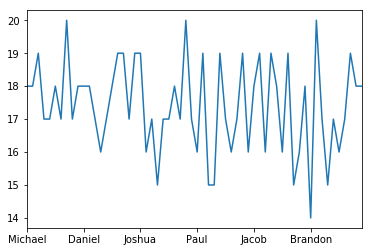

In [20]:
datedata.max().plot()

When you want to run such an aggregation function on *rows* instead, you have two options:

- to run the function on the *transpose* of the DataFrame `df.T`:

In [21]:
datedata.T.mean()

date
2018-09-01     0.000000
2018-09-02     0.450000
2018-09-03     1.116667
2018-09-04     1.750000
2018-09-05     2.433333
2018-09-06     3.150000
2018-09-07     3.800000
2018-09-08     3.883333
2018-09-09     5.233333
2018-09-10     5.516667
2018-09-11     5.950000
2018-09-12     5.900000
2018-09-13     8.350000
2018-09-14     7.733333
2018-09-15     8.366667
2018-09-16     9.500000
2018-09-17     9.583333
2018-09-18    10.633333
2018-09-19    11.566667
2018-09-20    12.350000
2018-09-21    13.250000
2018-09-22    11.966667
2018-09-23    11.033333
2018-09-24    10.166667
2018-09-25    10.000000
2018-09-26     8.666667
2018-09-27     9.150000
2018-09-28     7.250000
2018-09-29     7.333333
2018-09-30     6.583333
2018-10-01     6.066667
2018-10-02     5.950000
2018-10-03     5.116667
2018-10-04     3.600000
2018-10-05     3.300000
2018-10-06     3.566667
2018-10-07     2.483333
2018-10-08     1.500000
2018-10-09     1.133333
2018-10-10     0.566667
dtype: float64

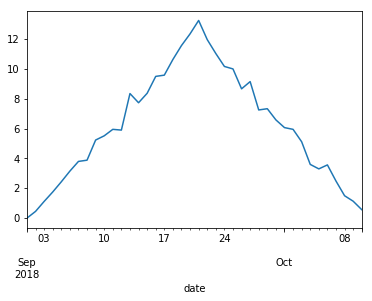

In [22]:
datedata.T.mean().plot()

(that last command was the same as these three lines -- easier to read, more to type:)

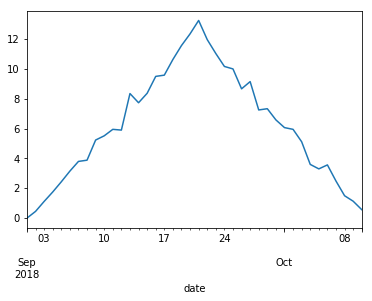

In [23]:
transposed_df = datedata.T
mean_per_day = transposed_df.mean()
mean_per_day.plot()

- or, you can specify the `axis=1` kwarg (`axis=0` works on columns, `axis=1` works on rows):

In [24]:
datedata.mean(axis=1)

date
2018-09-01     0.000000
2018-09-02     0.450000
2018-09-03     1.116667
2018-09-04     1.750000
2018-09-05     2.433333
2018-09-06     3.150000
2018-09-07     3.800000
2018-09-08     3.883333
2018-09-09     5.233333
2018-09-10     5.516667
2018-09-11     5.950000
2018-09-12     5.900000
2018-09-13     8.350000
2018-09-14     7.733333
2018-09-15     8.366667
2018-09-16     9.500000
2018-09-17     9.583333
2018-09-18    10.633333
2018-09-19    11.566667
2018-09-20    12.350000
2018-09-21    13.250000
2018-09-22    11.966667
2018-09-23    11.033333
2018-09-24    10.166667
2018-09-25    10.000000
2018-09-26     8.666667
2018-09-27     9.150000
2018-09-28     7.250000
2018-09-29     7.333333
2018-09-30     6.583333
2018-10-01     6.066667
2018-10-02     5.950000
2018-10-03     5.116667
2018-10-04     3.600000
2018-10-05     3.300000
2018-10-06     3.566667
2018-10-07     2.483333
2018-10-08     1.500000
2018-10-09     1.133333
2018-10-10     0.566667
dtype: float64

You can plot a DataFrame as a bar plot, which might be more useful than the (colorful) line plot we saw above:

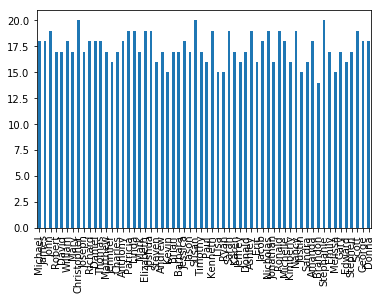

In [25]:
datedata.max().plot.bar()

### Slicing in Pandas

In [26]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [27]:
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

To select multiple columns from a DataFrame, you can use a *list* of column labels:

In [28]:
datedata[['James','Michael']]

James  Michael
date                      
2018-09-01      0        0
2018-09-02      1        0
2018-09-03      2        1
2018-09-04      1        3
2018-09-05      2        1
2018-09-06      1        2
2018-09-07      3        4
2018-09-08      2        7
2018-09-09      2        8
2018-09-10      6        3
2018-09-11     10        3
2018-09-12     11        3
2018-09-13      5       10
2018-09-14      9        5
2018-09-15      4        7
2018-09-16      4        4
2018-09-17      7        7
2018-09-18     16        7
2018-09-19      8       12
2018-09-20      6       18
2018-09-21     18        6
2018-09-22      4       13
2018-09-23     12       11
2018-09-24      5       11
2018-09-25     12        7
2018-09-26      7        7
2018-09-27     11        4
2018-09-28      5        6
2018-09-29     11        8
2018-09-30      3        8
2018-10-01      3        4
2018-10-02      5        4
2018-10-03      4        5
2018-10-04      4        7
2018-10-05      5        3
2018-10-06      5        4
2018-10-07      1        2
2018-10-08      1        3
2018-10-09      0        0
2018-10-10      1        0

To select individual values (or slices) from a DataFrame, use `.loc[]`

In [29]:
datedata.loc['2018-10-10', 'Michael']

0

In `.loc[]`, you can use slices for row and column labels.

The following example will assign the value `11` to all rows from `2018-09-01` to `2018-09-04` at the columns from `'Michael'` to `'John'`:

In [30]:
datedata.loc['2018-09-01':'2018-09-04', 'Michael':'John'] = 11

You can also assign to slices.  Then you can use a list or an array:

In [31]:
datedata.loc['2018-09-01':'2018-09-04', 'Michael'] = [1, 2, 3,  6]

The same works also for 2-D selections:

In [32]:
datedata.loc['2018-09-01':'2018-09-04', 'Michael':'James'] = [[1, 2], [3,  6,], [6, 5], [4, 30]]

In [33]:
datedata

Michael  James  John  Robert  David  William  Mary  Christopher  \
date                                                                          
2018-09-01        1      2    11       0      0        0     0            0   
2018-09-02        3      6    11       0      1        0     0            0   
2018-09-03        6      5    11       2      1        1     2            1   
2018-09-04        4     30    11       0      3        2     2            2   
2018-09-05        1      2     3       4      3        2     4            3   
2018-09-06        2      1     2       2      1        4     2            1   
2018-09-07        4      3     6       2      3        2     2            2   
2018-09-08        7      2     2       1      5        1     5            3   
2018-09-09        8      2     5       6      2        6     5            5   
2018-09-10        3      6     9       7      4        4     8            3   
2018-09-11        3     10     5      10      4        7     6            7   
2018-09-12        3     11     7       7      7        6     5            8   
2018-09-13       10      5     4       9      6        6    11            8   
2018-09-14        5      9     5      13      5        9     9            5   
2018-09-15        7      4     4       8      3        9     4           10   
2018-09-16        4      4    15       8     10       15    13            9   
2018-09-17        7      7     5      15      8        4     5           15   
2018-09-18        7     16    11      10     10       16    12           11   
2018-09-19       12      8     9      10      6       18    10           18   
2018-09-20       18      6    10       7     17       12     6           19   
2018-09-21        6     18    19      17      9       12     9           20   
2018-09-22       13      4    14       4     14        5    17            8   
2018-09-23       11     12    12       4      9       18    15            5   
2018-09-24       11      5    17       7      7        9     8           13   
2018-09-25        7     12     7       6     13        5     9           15   
2018-09-26        7      7    12      15      9        3     3           10   
2018-09-27        4     11    11       6     12       10    13            6   
2018-09-28        6      5     7       4      6        3     7           10   
2018-09-29        8     11     4       9      7       12     8            6   
2018-09-30        8      3     2      11      7        7     2            7   
2018-10-01        4      3    10       3      9        8     8            4   
2018-10-02        4      5     5       5      6        4     8            9   
2018-10-03        5      4     4       6      3        7     4            3   
2018-10-04        7      4     2       3      2        3     2            5   
2018-10-05        3      5     2       3      2        5     3            2   
2018-10-06        4      5     3       4      4        4     5            5   
2018-10-07        2      1     2       2      2        4     4            3   
2018-10-08        3      1     2       3      0        3     1            2   
2018-10-09        0      0     1       2      1        2     1            2   
2018-10-10        0      1     1       1      1        1     1            1   

            Joseph  Richard  ...  Brandon  Stephanie  Emily  Melissa  Gary  \
date                         ...                                             
2018-09-01       0        0  ...        0          0      0        0     0   
2018-09-02       0        1  ...        1          1      0        0     1   
2018-09-03       0        1  ...        2          2      0        2     2   
2018-09-04       3        2  ...        1          2      2        1     1   
2018-09-05       1        1  ...        1          3      4        1     1   
2018-09-06       5        3  ...        3          5      4        4     4   
2018-09-07       6        5  ...        5          2      5        4 

### Creating new Pandas objects

Constant value at multiple locations:

In [34]:
pd.Series(5, index=['a', 'b', 'c'])

a    5
b    5
c    5
dtype: int64

Empty Series with given index:

In [35]:
pd.Series(index=['a', 'b', 'c'])

a   NaN
b   NaN
c   NaN
dtype: float64

A Series with labels and data

In [36]:
pd.Series([2, 5, 8], index=['a', 'b', 'c'])

a    2
b    5
c    8
dtype: int64

A [dictionary](https://docs.python.org/3.6/library/stdtypes.html#dict) is a basic Python data structure, its entries have a *key* and a *value*:

In [37]:
mydict = {'a': 2, 5: 'bb', 'v': [1, 2]}

In [38]:
mydict['v']

[1, 2]

We can use a dict to create a Series.  In that case, the Series' index (labels) is taken from the dict's keys:

In [39]:
pd.Series({'a': 2, 'b': 5, 'c': 8})

a    2
b    5
c    8
dtype: int64

Explicitly specifying the index again doesn't change anything:

In [40]:
pd.Series({'a': 2, 'b': 5, 'c': 8}, index=['a', 'b', 'c'])

a    2
b    5
c    8
dtype: int64

However, when when using a dict as `data` **and** explicitly specifiying an index via `index`, then the explicit index takes precedence over the implicit one:

In [41]:
pd.Series({'a': 2, 'b': 5, 'c': 8}, index=['a', 'c'])

a    2
c    8
dtype: int64

In [42]:
pd.Series({'a': 2, 'b': 5, 'c': 8}, index=['d', 'e'])

d   NaN
e   NaN
dtype: float64

When using a dict to create a DataFrame, the dict keys give the column labels, and the dict values give the column data:

In [43]:
pd.DataFrame({'a': np.arange(5), 'b': np.arange(6, 11)})

a   b
0  0   6
1  1   7
2  2   8
3  3   9
4  4  10

Of course, you can also create an empty DataFrame with given columns:

In [44]:
pd.DataFrame(columns=['a', 'b'])

Empty DataFrame
Columns: [a, b]
Index: []

### Missing data

In Pandas object, missing data are indicated using `np.nan`

In [45]:
datedata.loc['2018-09-01', 'Joseph' ] = np.nan

Missing data do not influenct calculations: Pandas simply ignores such values:

In [46]:
datedata.mean()

Michael        5.700000
James          6.400000
John           7.075000
Robert         5.900000
David          5.550000
William        6.225000
Mary           5.975000
Christopher    6.650000
Joseph         6.794872
Richard        6.525000
Daniel         6.775000
Thomas         5.800000
Matthew        6.225000
Jennifer       5.750000
Charles        5.225000
Anthony        6.300000
Patricia       6.550000
Linda          5.700000
Mark           5.850000
Elizabeth      6.550000
Joshua         5.775000
Steven         5.825000
Andrew         6.175000
Kevin          6.100000
Brian          5.800000
Barbara        6.425000
Jessica        6.050000
Jason          6.025000
Susan          6.175000
Timothy        6.550000
Paul           6.175000
Kenneth        6.350000
Lisa           6.725000
Ryan           6.125000
Sarah          7.075000
Karen          5.725000
Jeffrey        5.925000
Donald         6.150000
Ashley         6.075000
Eric           5.750000
Jacob          5.975000
Nicholas       5

For comparison, in numpy arrays, a `np.nan` values "contaminates" all calculations:

In [47]:
olddata

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [48]:
olddata[0, 0] = np.nan

In [49]:
olddata

array([[nan,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ...,
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

In [50]:
olddata.mean(axis=1)

array([  nan, 5.425, 6.1  , 5.9  , 5.55 , 6.225, 5.975, 6.65 , 6.625,
       6.525, 6.775, 5.8  , 6.225, 5.75 , 5.225, 6.3  , 6.55 , 5.7  ,
       5.85 , 6.55 , 5.775, 5.825, 6.175, 6.1  , 5.8  , 6.425, 6.05 ,
       6.025, 6.175, 6.55 , 6.175, 6.35 , 6.725, 6.125, 7.075, 5.725,
       5.925, 6.15 , 6.075, 5.75 , 5.975, 5.725, 6.3  , 5.9  , 6.75 ,
       5.925, 7.225, 6.15 , 5.95 , 6.275, 5.7  , 6.1  , 6.825, 5.975,
       6.725, 5.7  , 6.25 , 6.4  , 7.05 , 5.9  ])

### DataFrames vs. Series

You can think of a DataFrame as an Excel sheet, and of a Series as a column of that sheet.

Or, you can think of a Series as a 1-D array with labels, and of a DataFrame as a collection of Series with (usually) common labels

In [51]:
type(datedata), type(datedata['John'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

Selecting from a DataFrame like `df[col_label]` returns a Series:

In [52]:
datedata['John']

date
2018-09-01    11
2018-09-02    11
2018-09-03    11
2018-09-04    11
2018-09-05     3
2018-09-06     2
2018-09-07     6
2018-09-08     2
2018-09-09     5
2018-09-10     9
2018-09-11     5
2018-09-12     7
2018-09-13     4
2018-09-14     5
2018-09-15     4
2018-09-16    15
2018-09-17     5
2018-09-18    11
2018-09-19     9
2018-09-20    10
2018-09-21    19
2018-09-22    14
2018-09-23    12
2018-09-24    17
2018-09-25     7
2018-09-26    12
2018-09-27    11
2018-09-28     7
2018-09-29     4
2018-09-30     2
2018-10-01    10
2018-10-02     5
2018-10-03     4
2018-10-04     2
2018-10-05     2
2018-10-06     3
2018-10-07     2
2018-10-08     2
2018-10-09     1
2018-10-10     1
Name: John, dtype: int64

Selecting from a DataFrame like `df[[col_label_1, col_label_2]]`  returns a DataFrame.  When only `col_label_1` is given, it will be a DataFrame with only one column:

In [53]:
datedata[['John']]

John
date            
2018-09-01    11
2018-09-02    11
2018-09-03    11
2018-09-04    11
2018-09-05     3
2018-09-06     2
2018-09-07     6
2018-09-08     2
2018-09-09     5
2018-09-10     9
2018-09-11     5
2018-09-12     7
2018-09-13     4
2018-09-14     5
2018-09-15     4
2018-09-16    15
2018-09-17     5
2018-09-18    11
2018-09-19     9
2018-09-20    10
2018-09-21    19
2018-09-22    14
2018-09-23    12
2018-09-24    17
2018-09-25     7
2018-09-26    12
2018-09-27    11
2018-09-28     7
2018-09-29     4
2018-09-30     2
2018-10-01    10
2018-10-02     5
2018-10-03     4
2018-10-04     2
2018-10-05     2
2018-10-06     3
2018-10-07     2
2018-10-08     2
2018-10-09     1
2018-10-10     1